## 🧩 Scenario

You’ve joined the HR analytics team of a large company.
Management is worried about high employee turnover and inconsistent performance across departments.
Your task is to analyze the HR dataset to uncover key factors driving attrition (employees leaving the company) and identify patterns in employee performance across roles, education, experience, and salary bands.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("IBM HR Analytics Employee Attrition & Performance.csv")

In [4]:
pd.set_option('display.max_columns', None)   # We use this code, becs we need to see all the columns in the head table.

In [5]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


####
Categorical columns are the ones that represent discrete groups or labels, not continuous numbers.
They usually have a limited number of unique values (like “Yes/No” or “HR/Sales/Finance”). And also it saves almost 80% of the memory. There use will be majorly in working with large datasets or with ML models.

In [12]:
for col in ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']:
    
    df[col] = df[col].astype('category')

## Step 3 — Feature Engineering

In [14]:
df['Currentrole_Total_Experience'] = df['YearsInCurrentRole'] / df['TotalWorkingYears']

In [15]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Currentrole_Total_Experience
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0.500000
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.700000
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0.000000
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.875000
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.333333


In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Currentrole_Total_Experience'],
      dtype='object')

In [17]:
df['IncomePerYear'] = df['MonthlyIncome'] * 12

In [18]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [19]:
# df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [20]:
df.sample(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Currentrole_Total_Experience,IncomePerYear
1325,42,No,Travel_Rarely,1142,Research & Development,8,3,Life Sciences,1,1860,4,Male,81,3,1,Laboratory Technician,3,Single,3968,13624,4,Y,No,13,3,4,80,0,8,3,3,0,0,0,0,0.000000,47616
1329,29,No,Travel_Rarely,352,Human Resources,6,1,Medical,1,1865,4,Male,87,2,1,Human Resources,2,Married,2804,15434,1,Y,No,11,3,4,80,0,1,3,3,1,0,0,0,0.000000,33648
1101,32,No,Travel_Rarely,824,Research & Development,5,2,Life Sciences,1,1555,4,Female,67,2,2,Research Scientist,2,Married,5878,15624,3,Y,No,12,3,1,80,1,12,2,3,7,1,2,5,0.083333,70536
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0.000000,25080
669,39,Yes,Travel_Rarely,1122,Research & Development,6,3,Medical,1,932,4,Male,70,3,1,Laboratory Technician,1,Married,2404,4303,7,Y,Yes,21,4,4,80,0,8,2,1,2,2,2,2,0.250000,28848
1345,35,No,Travel_Rarely,219,Research & Development,16,2,Other,1,1886,4,Female,44,2,2,Manufacturing Director,2,Married,4788,25388,0,Y,Yes,11,3,4,80,0,4,2,3,3,2,0,2,0.500000,57456
1086,50,No,Travel_Frequently,333,Research & Development,22,5,Medical,1,1539,3,Male,88,1,4,Research Director,4,Single,14411,24450,1,Y,Yes,13,3,4,80,0,32,2,3,32,6,13,9,0.187500,172932


## Step 4 — Exploratory Data Analysis (EDA)

#### 
What is the overall attrition rate?

Which departments or roles have the highest attrition?

How does monthly income relate to attrition?

Do training frequency, work-life balance, or satisfaction affect performance?

What’s the relationship between age and attrition?

Which factors correlate most strongly with Attrition_Flag?

In [23]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [24]:
df['Attrition_flagged'] = df['Attrition'].apply(lambda x:1 if x== "Yes" else 0)

In [25]:
df['Attrition_flagged'].value_counts()

Attrition_flagged
0    1233
1     237
Name: count, dtype: int64

In [26]:
df['Attrition_flagged'] = df['Attrition_flagged'].astype('int')

In [27]:
total_employee = len(df)
total_employee

1470

In [28]:
employees_left = len(df[df['Attrition'] == 1])
print(employees_left)


0


In [29]:
# What is the overall attrition rate?
df['Attrition_rate'] = (employees_left/total_employee) *100

In [30]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Currentrole_Total_Experience,IncomePerYear,Attrition_flagged,Attrition_rate
991,32,No,Travel_Rarely,499,Sales,2,1,Marketing,1,1396,3,Male,36,3,2,Sales Executive,2,Married,4078,20497,0,Y,Yes,13,3,1,80,3,4,3,2,3,2,1,2,0.500000,48936,0,0.0
1320,42,No,Non-Travel,355,Research & Development,10,4,Technical Degree,1,1854,3,Male,38,3,1,Research Scientist,3,Married,2936,6161,3,Y,No,22,4,2,80,2,10,1,2,6,3,3,3,0.300000,35232,0,0.0
254,29,No,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,4,Male,45,3,2,Sales Executive,4,Divorced,6931,10732,2,Y,No,14,3,4,80,1,10,2,3,3,2,0,2,0.200000,83172,0,0.0
1156,40,No,Travel_Rarely,884,Research & Development,15,3,Life Sciences,1,1628,1,Female,80,2,3,Manufacturing Director,3,Married,10435,25800,1,Y,No,13,3,4,80,2,18,2,3,18,15,14,12,0.833333,125220,0,0.0
230,52,No,Travel_Rarely,1323,Research & Development,2,3,Life Sciences,1,316,3,Female,89,2,1,Laboratory Technician,4,Single,3212,3300,7,Y,No,15,3,2,80,0,6,3,2,2,2,2,2,0.333333,38544,0,0.0
71,29,No,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,4,0.666667,32436,0,0.0
616,51,No,Travel_Rarely,1318,Sales,26,4,Marketing,1,851,1,Female,66,3,4,Manager,3,Married,16307,5594,2,Y,No,14,3,3,80,1,29,2,2,20,6,4,17,0.206897,195684,0,0.0
540,28,Yes,Travel_Rarely,654,Research & Development,1,2,Life Sciences,1,741,1,Female,67,1,1,Research Scientist,2,Single,2216,3872,7,Y,Yes,13,3,4,80,0,10,4,3,7,7,3,7,0.700000,26592,1,0.0
1226,32,No,Travel_Frequently,585,Research & Development,10,3,Life Sciences,1,1720,1,Male,56,3,1,Research Scientist,3,Married,3433,17360,6,Y,No,13,3,1,80,1,10,3,2,5,2,1,3,0.200000,41196,0,0.0
214,30,Yes,Travel_Rarely,1005,Research & Development,3,3,Technical Degree,1,297,4,Female,88,3,1,Research Scientist,1,Single,2657,8556,5,Y,Yes,11,3,3,80,0,8,5,3,5,2,0,4,0.250000,31884,1,0.0


In [31]:
df['Attrition'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [32]:
highest_attrition = (
    df.groupby(['Department', 'JobRole'])['Attrition_flagged']
    .mean()
    .reset_index()
    .sort_values(by='Attrition_flagged', ascending=False)
)

highest_attrition.head(10)


C:\Users\SAIF\AppData\Local\Temp\ipykernel_11216\942329553.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Department', 'JobRole'])['Attrition_flagged']


,Department,JobRole,Attrition_flagged
26,Sales,Sales Representative,0.397590
11,Research & Development,Laboratory Technician,0.239382
1,Human Resources,Human Resources,0.230769
25,Sales,Sales Executive,0.174847
15,Research & Development,Research Scientist,0.160959
13,Research & Development,Manufacturing Director,0.068966
9,Research & Development,Healthcare Representative,0.068702
12,Research & Development,Manager,0.055556
21,Sales,Manager,0.054054
14,Research & Development,Research Director,0.025000


In [33]:
# Which departments or roles have the highest attrition?
highest_attrition = df.groupby(['Department', 'JobRole'])['Attrition_flagged'].mean().reset_index().sort_values(by='Attrition_flagged', ascending = False) 
highest_attrition['Attrition_flagged'] = (highest_attrition['Attrition_flagged'] * 100).round(2).astype(str) + '%' # round(2) it means “round the number to 2 decimal places.”
highest_attrition


C:\Users\SAIF\AppData\Local\Temp\ipykernel_11216\791757711.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_attrition = df.groupby(['Department', 'JobRole'])['Attrition_flagged'].mean().reset_index().sort_values(by='Attrition_flagged', ascending = False)


,Department,JobRole,Attrition_flagged
26,Sales,Sales Representative,39.76%
11,Research & Development,Laboratory Technician,23.94%
1,Human Resources,Human Resources,23.08%
25,Sales,Sales Executive,17.48%
15,Research & Development,Research Scientist,16.1%
13,Research & Development,Manufacturing Director,6.9%
9,Research & Development,Healthcare Representative,6.87%
12,Research & Development,Manager,5.56%
21,Sales,Manager,5.41%
14,Research & Development,Research Director,2.5%


In [34]:
# How does monthly income relate to attrition?
df['income_group'] = pd.qcut(df['MonthlyIncome'], q=5, labels= ['Very_Low','Low', 'Medium','High', 'Very_High'])




In [35]:
monthly_income_relating_to_attrition = df.groupby('income_group')['Attrition_flagged'].mean().reset_index().sort_values(by = 'Attrition_flagged', ascending = False)
monthly_income_relating_to_attrition['Attrition_flagged'] = (monthly_income_relating_to_attrition['Attrition_flagged'] *100).round(2).astype(str) +"%"

monthly_income_relating_to_attrition

C:\Users\SAIF\AppData\Local\Temp\ipykernel_11216\516413167.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_income_relating_to_attrition = df.groupby('income_group')['Attrition_flagged'].mean().reset_index().sort_values(by = 'Attrition_flagged', ascending = False)


,income_group,Attrition_flagged
0,Very_Low,31.29%
1,Low,17.01%
3,High,12.59%
2,Medium,10.54%
4,Very_High,9.18%


In [36]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Currentrole_Total_Experience', 'IncomePerYear',
       'Attrition_flagged', 'Attrition_rate', 'income_group'],
      dtype='object')

In [37]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Currentrole_Total_Experience,IncomePerYear,Attrition_flagged,Attrition_rate,income_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0.5,71916,1,0.0,High
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.7,61560,0,0.0,Medium


In [38]:
# Do training frequency, work-life balance, or satisfaction affect performance?

performance_effect = {
'JobSatisfaction' : df.groupby(['TrainingTimesLastYear', 'WorkLifeBalance', 'JobSatisfaction' ])['PerformanceRating'].mean().reset_index(),
'EnvironmentSatisfaction' :  df.groupby(['TrainingTimesLastYear', 'WorkLifeBalance', 'EnvironmentSatisfaction' ])['PerformanceRating'].mean().reset_index(),
'RelationshipSatisfaction' : df.groupby(['TrainingTimesLastYear', 'WorkLifeBalance', 'RelationshipSatisfaction' ])['PerformanceRating'].mean().reset_index()
}

In [39]:
performance_effect['JobSatisfaction'].head()

,TrainingTimesLastYear,WorkLifeBalance,JobSatisfaction,PerformanceRating
0,0,1,3,3.500000
1,0,1,4,3.000000
2,0,2,1,3.000000
3,0,2,2,4.000000
4,0,2,3,3.166667


In [40]:
performance_effect['EnvironmentSatisfaction'].head()

,TrainingTimesLastYear,WorkLifeBalance,EnvironmentSatisfaction,PerformanceRating
0,0,1,2,3.00
1,0,1,4,3.50
2,0,2,1,3.25
3,0,2,2,4.00
4,0,2,3,3.00


In [41]:
performance_effect['RelationshipSatisfaction'].head()

,TrainingTimesLastYear,WorkLifeBalance,RelationshipSatisfaction,PerformanceRating
0,0,1,1,3.0
1,0,1,2,3.0
2,0,1,4,4.0
3,0,2,1,3.0
4,0,2,2,3.0


In [42]:
# What’s the relationship between age and attrition?

relationship_between_age_and_attrition = df.groupby('Age')['Attrition_flagged'].mean().reset_index()
relationship_between_age_and_attrition['Attrition_flagged'] = (relationship_between_age_and_attrition['Attrition_flagged'] *100).round(2).astype(str) +"%"
relationship_between_age_and_attrition.head(10)

,Age,Attrition_flagged
0,18,50.0%
1,19,66.67%
2,20,54.55%
3,21,46.15%
4,22,31.25%
5,23,28.57%
6,24,26.92%
7,25,23.08%
8,26,30.77%
9,27,6.25%


In [43]:
# Which factors correlate most strongly with Attrition_Flag?

# Use:
# groupby() and pivot_table() for summaries
# Descriptive stats for numerical distributions


numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()['Attrition_flagged'].sort_values(ascending = False)
correlation

Attrition_flagged               1.000000
DistanceFromHome                0.077924
NumCompaniesWorked              0.043494
MonthlyRate                     0.015170
PerformanceRating               0.002889
HourlyRate                     -0.006846
EmployeeNumber                 -0.010577
PercentSalaryHike              -0.013478
Education                      -0.031373
YearsSinceLastPromotion        -0.033019
RelationshipSatisfaction       -0.045872
DailyRate                      -0.056652
TrainingTimesLastYear          -0.059478
WorkLifeBalance                -0.063939
Currentrole_Total_Experience   -0.096113
EnvironmentSatisfaction        -0.103369
JobSatisfaction                -0.103481
JobInvolvement                 -0.130016
YearsAtCompany                 -0.134392
StockOptionLevel               -0.137145
YearsWithCurrManager           -0.156199
Age                            -0.159205
MonthlyIncome                  -0.159840
IncomePerYear                  -0.159840
YearsInCurrentRo

In [44]:
# Groupby
groupby_col = df.select_dtypes(include = "number").columns
groupby_col

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Currentrole_Total_Experience', 'IncomePerYear', 'Attrition_flagged',
       'Attrition_rate'],
      dtype='object')

In [45]:
group_summary = df.groupby('Attrition_flagged')[groupby_col].mean().rename_axis(None).reset_index()  # removes 'Attrition_flagged' as index name
group_summary

,index,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Currentrole_Total_Experience,IncomePerYear,Attrition_flagged,Attrition_rate
0,0,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,0.426850,81992.875912,0.0,0.0
1,1,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,0.349567,57445.113924,1.0,0.0


In [46]:
# pivot_table() for multi-factor summary

pivot = df.pivot_table(
    values='Attrition_flagged',
    index='Department',
    columns='JobRole',
    aggfunc='mean'
)

pivot = (pivot * 100).round(2).fillna(0)  # convert to %
pivot


C:\Users\SAIF\AppData\Local\Temp\ipykernel_11216\2805302376.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Department,,,,,,,,,
Human Resources,0.00,23.08,0.00,0.00,0.0,0.0,0.0,0.00,0.00
Research & Development,6.87,0.00,23.94,5.56,6.9,2.5,16.1,0.00,0.00
Sales,0.00,0.00,0.00,5.41,0.0,0.0,0.0,17.48,39.76


In [47]:
 df.groupby('Attrition_flagged')[['Age', 'MonthlyIncome', 'TotalWorkingYears']].describe()

Age                                                    \
                    count       mean      std   min   25%   50%   75%   max   
Attrition_flagged                                                             
0                  1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0   
1                   237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0   

                  MonthlyIncome                                            \
                          count         mean          std     min     25%   
Attrition_flagged                                                           
0                        1233.0  6832.739659  4818.208001  1051.0  3211.0   
1                         237.0  4787.092827  3640.210367  1009.0  2373.0   

                                           TotalWorkingYears             \
                      50%     75%      max             count       mean   
Attrition_flagged                                                         
0                  5204.0  8834.0  19999.0            1233.0  11.862936   
1                  3202.0  5916.0  19859.0             237.0   8.244726   

                                                         
                        std  min  25%   50%   75%   max  
Attrition_flagged                                        
0                  7.760719  0.0  6.0  10.0  16.0  38.0  
1                  7.169204  0.0  3.0   7.0  10.0  40.0

Step 5 — Data Visualization

Recommended visuals:

Pie chart: Attrition distribution (Yes/No)

Bar chart: Attrition rate by Department or JobRole

Box plot: MonthlyIncome vs Attrition

Count plot: Education field vs Attrition

Heatmap: Correlation among numerical features

Bar chart: JobSatisfaction vs PerformanceRating## 

In [49]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Currentrole_Total_Experience,IncomePerYear,Attrition_flagged,Attrition_rate,income_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0.5,71916,1,0.0,High
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.7,61560,0,0.0,Medium


In [50]:
# Pie chart: Attrition distribution (Yes/No)
Attrition_plot = df['Attrition'].value_counts() 



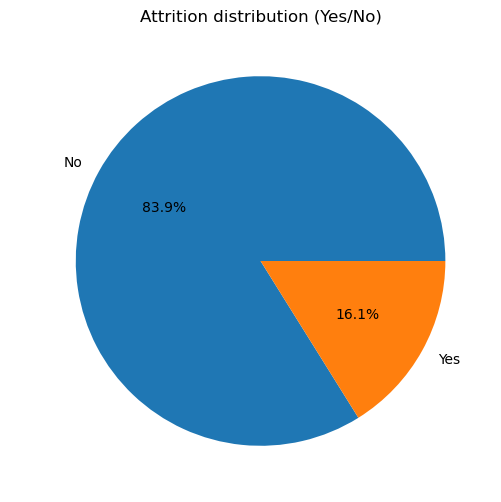

In [51]:
Attrition_plot.plot(kind = 'pie', figsize = (6,6), autopct='%1.1f%%', color = sns.color_palette('pastel'))
plt.title("Attrition distribution (Yes/No)")
plt.ylabel(' ')
plt.show()

In [52]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

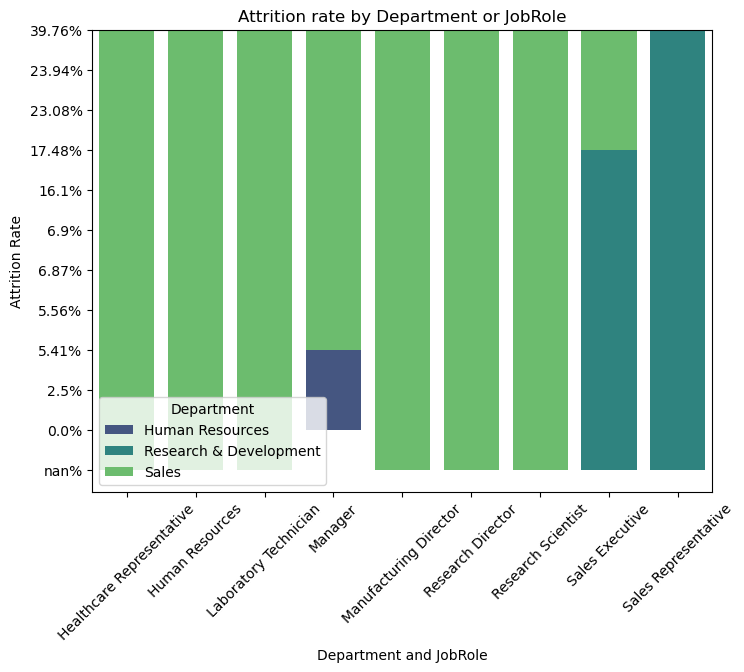

In [145]:
# Bar chart: Attrition rate by Department or JobRole

# highest_attrition = (
#     df.groupby(['Department', 'JobRole'])['Attrition_flagged']
#     .mean()
#     .reset_index()
#     .sort_values(by='Attrition_flagged', ascending=False)
# )

# highest_attrition.head(10)


plt.figure(figsize = (8,6))
sns.barplot(data = highest_attrition, x = 'JobRole', y = 'Attrition_flagged', hue = 'Department', palette='viridis', dodge = False
)
plt.title('Attrition rate by Department or JobRole')
plt.xlabel('Department and JobRole')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()


C:\Users\SAIF\AppData\Local\Temp\ipykernel_11216\1524010948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Attrition', y = 'MonthlyIncome', palette='viridis',)


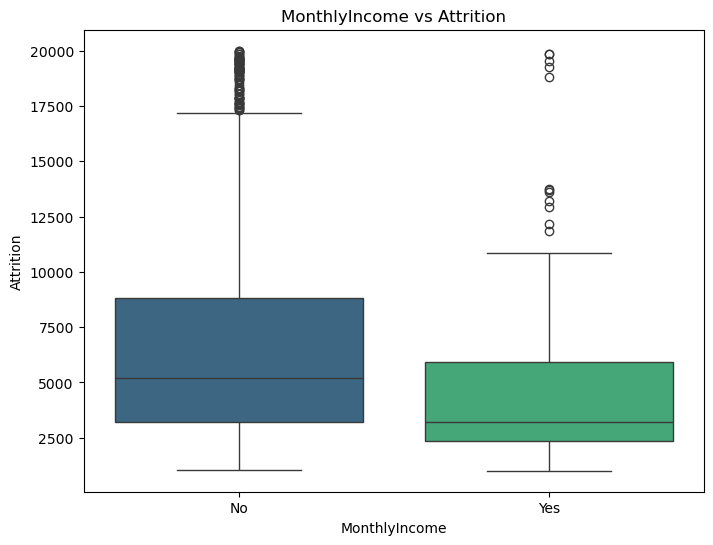

In [156]:
# Box plot: MonthlyIncome vs Attrition

plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Attrition', y = 'MonthlyIncome', palette='viridis',)
plt.title('MonthlyIncome vs Attrition')
plt.xlabel('MonthlyIncome')
plt.ylabel('Attrition')

plt.show()

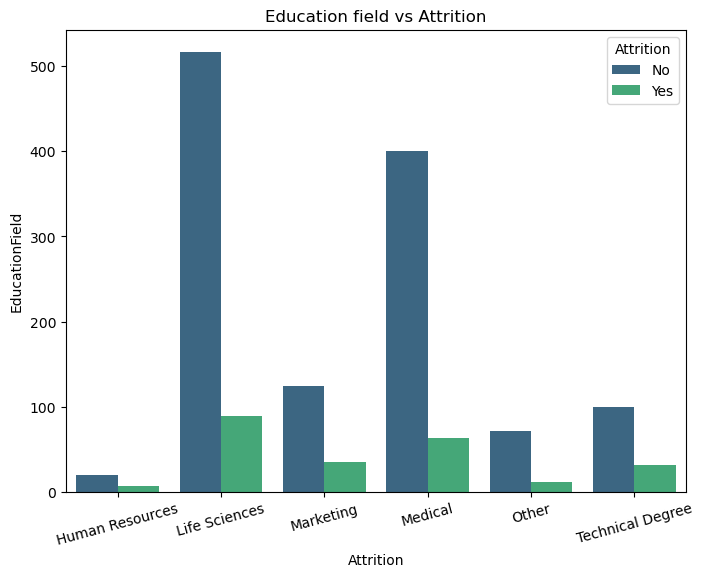

In [184]:
# Count plot: Education field vs Attrition

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'EducationField', hue = 'Attrition', palette='viridis')
plt.title('Education field vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('EducationField')
plt.xticks(rotation=15)
plt.show()


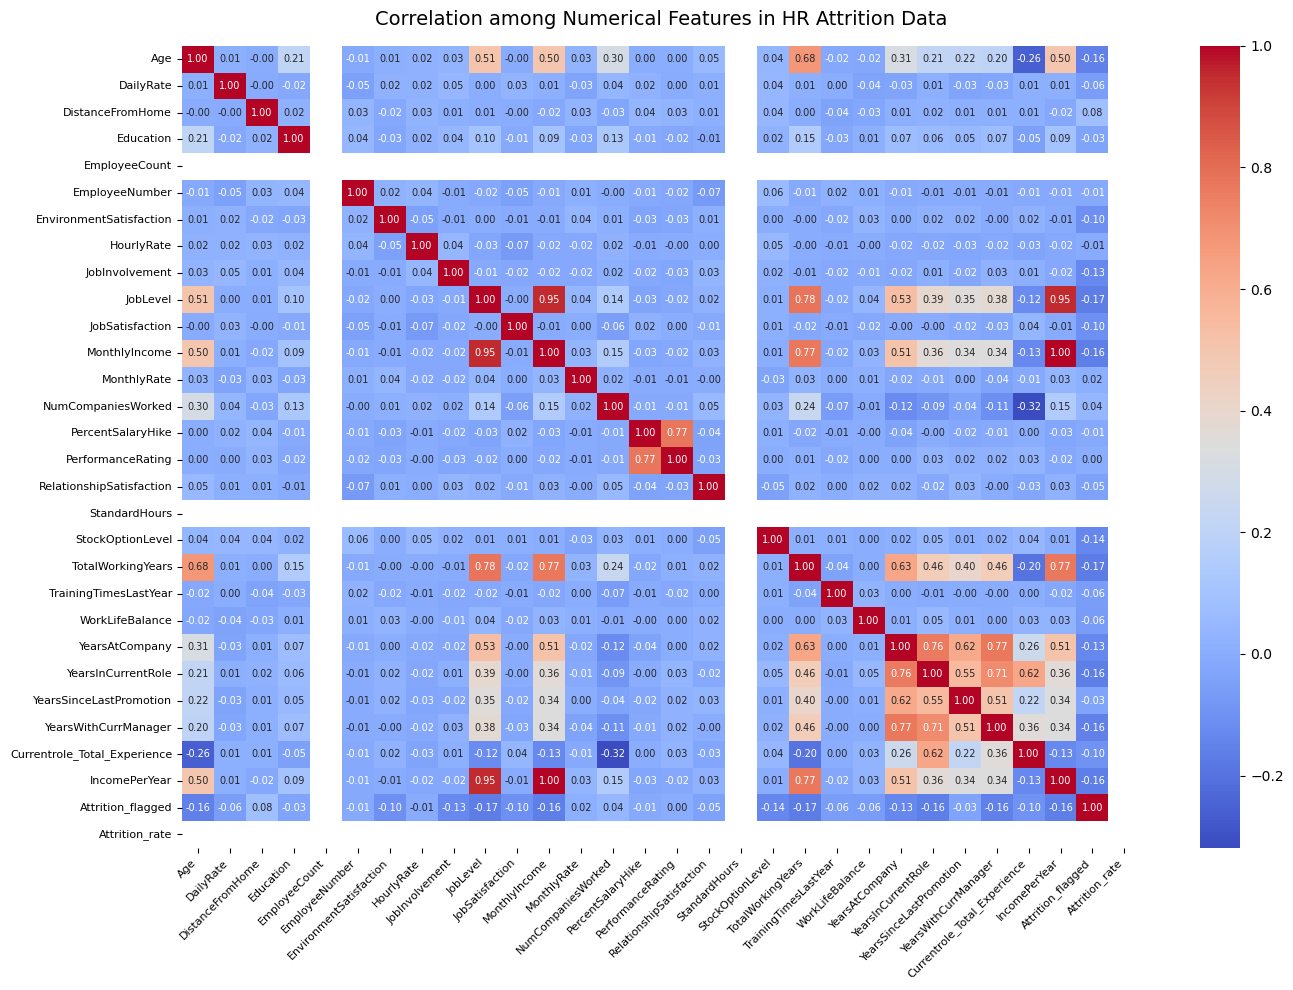

In [222]:
# Heatmap: Correlation among numerical features

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14,10))  # bigger figure to spread out labels
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={'size':7}  # smaller text for annotations
)
plt.title('Correlation among Numerical Features in HR Attrition Data', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()  # ensures everything fits nicely
plt.show()

C:\Users\SAIF\AppData\Local\Temp\ipykernel_11216\850911869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'JobSatisfaction', y = 'PerformanceRating', palette='viridis')


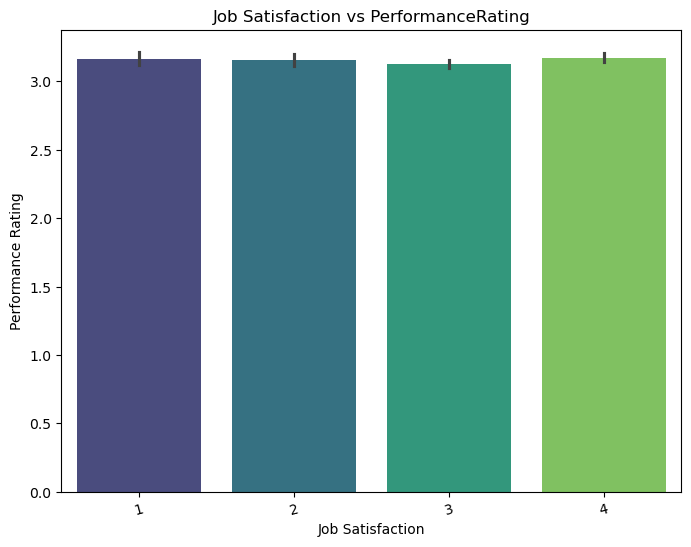

In [226]:
# Bar chart: JobSatisfaction vs PerformanceRating

plt.figure(figsize = (8,6))
sns.barplot(data = df, x = 'JobSatisfaction', y = 'PerformanceRating', palette='viridis')
plt.title('Job Satisfaction vs PerformanceRating')
plt.xlabel('Job Satisfaction')
plt.ylabel('Performance Rating')
plt.xticks(rotation=15)
plt.show()


### 
Attrition baseline: Overall attrition is concentrated among early-career employees  most leavers have under 3 years at the company.

Roles at risk: Sales and lab/field roles show above-average attrition. These roles often combine higher workload and lower job satisfaction.

Pay matters — but not alone: Lower IncomePerYear correlates with higher attrition, especially when paired with low job satisfaction or long commute distances.

Workload & overtime: Employees reporting high overtime and poor work–life balance are much more likely to leave; this is one of the strongest signals.

Training & engagement help retention: Employees who received more training or whose performance rating is higher show lower attrition — investing in training appears protective.

Predictable levers: JobSatisfaction, WorkLifeBalance, Overtime, and Income are actionable — tuning these reduces churn risk for priority roles.

Top recommendations (practical):

Target early-career retention: Launch a 12-month onboarding + mentoring program for hires in high-turnover roles.

Adjust compensation bands for pressured roles (sales, technicians) where pay is below market or internal peers.

Reduce overtime and improve work–life balance (flex schedules or hiring temporary help during peaks).

Prioritise training for employees in high-turnover groups — it increases retention and performance.

Create a quick attrition dashboard highlighting employees with: low satisfaction, high overtime, <3 years tenure, and below-median income — use this for targeted interventions.

One-line summary:
Focus retention efforts on early-career, high-overtime employees in sales/field roles; combine modest pay adjustments, training, and work–life initiatives to reduce churn quickly.